# AMS 325 Project: Part 1: Multiple Linear Regression

##  Members: Hangting Lu, Chisom Uwakwe, Kevin Coughlin

### This project is aimed at assessing various students based on: no. f hours studied, previous test scores, no. of extracurricular activities, no. of hours slept, and, no. of sample tests practiced.

### Using these criteria, each student is given a performance index score from 10-100 which represents the overall academic performance of the student.

In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
# Read the downloaded DataFrame from the dataset and make adjustments
df_stud = pd.read_csv("C:\\Users\\chiso\\OneDrive\\Documents\\540256\\Student_Performance.csv")
df_stud.rename(columns={
    'Hours Studied': 'Hours_Studied',
    'Previous Scores': 'Previous_Scores',
    'Extracurricular Activities': 'Extracurriculars',
    'Sleep Hours': 'Sleep_Hours',
    'Sample Question Papers Practiced': 'Samples_Practiced',
    'Performance Index': 'Performance_Index'    
}, inplace=True)

df_sub = df_stud.drop(columns=["Extracurriculars"])


In [94]:
# Prepare the features (X) and target variable (y)
import statsmodels.api as sm
import pandas as pd

# Define the independent variables (X) and dependent variable (y)
X = df_sub.drop(columns=["Performance_Index"])
X = sm.add_constant(X)  # Adds a constant term to the model
y = df_sub["Performance_Index"]

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

#X = df_sub.drop(columns=['Performance_Index'])
#y = df_sub['Performance_Index']

                            OLS Regression Results                            
Dep. Variable:      Performance_Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.147e+05
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:57:00   Log-Likelihood:                -21418.
No. Observations:               10000   AIC:                         4.285e+04
Df Residuals:                    9995   BIC:                         4.288e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -33.7637      0.12

In [96]:
# Extract coefficients
coefficients = model.params

# Display the model equation
model_equation = "Performance Index = " + " + ".join([f"{coeff:.2f}*{col}" if col != "const" else f"{coeff:.2f}" 
                                                      for col, coeff in coefficients.items()])
print("Model Equation:")
print(model_equation)


Model Equation:
Performance Index = -33.76 + 2.85*Hours_Studied + 1.02*Previous_Scores + 0.48*Sleep_Hours + 0.20*Samples_Practiced


In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Step 6: Create a linear regression model and train it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [102]:
# Step 7: Make predictions
y_pred = model.predict(X_test)


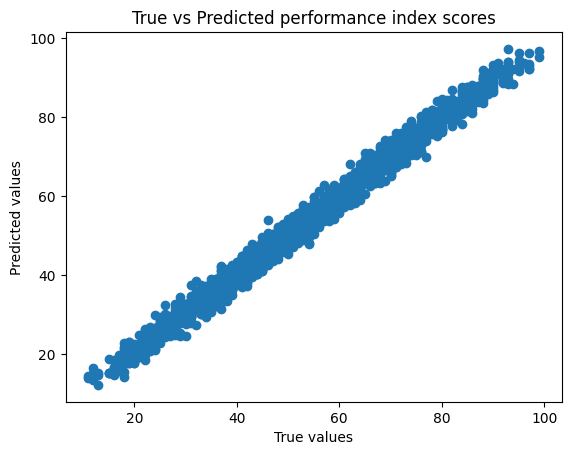

In [104]:
# Step 9: Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted performance index scores")
plt.show()

In [87]:
# Save the trained model for later use
import joblib
joblib.dump(model, 'student_performance_model.pkl')

['student_performance_model.pkl']